# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_style("whitegrid")  # Белый фон с серой сеткой
sns.set_palette("pastel")  # Мягкая цветовая палитра

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [3]:
books = pd.read_parquet("./goodsread/books.parquet")

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [5]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [6]:
interactions = pd.read_parquet("./goodsread/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [7]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [8]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [9]:
books.sample(3).T

,544307,2090774,768793
book_id,18641060,458322,15709104
author,Dormaine G.,Kay Hooper,Kelly Favor
title,Connor,Blood Dreams (Bishop/Special Crimes Unit #10),"For His Pleasure (For His Pleasure, #1)"
description,"I, Connor, thought I was the average sarcastic...",THIS KILLER DREAMS IN SHADES OF DEATH...\nHe's...,When twenty-two year old Nicole Masters gets a...
genre_and_votes,"{'Fantasy': 5, 'Science Fiction': 3}","{'Fantasy-Paranormal': 114, 'Mystery': 109, 'R...","{'Romance': 85, 'Adult Fiction-Erotica': 64, '..."
num_pages,258,324,126
average_rating,3.94,4.06,3.59
ratings_count,32,6391,5239
text_reviews_count,29,249,295
publisher,Xlibris Corporation,,B&N Digital Publishing


In [10]:
# Количество пользователей

n_users = interactions['user_id'].nunique()
print(f"Количество пользователей: {n_users}")

Количество пользователей: 542657


In [11]:
# Среднее количество прочитанных книг на пользователя

avg_books_per_user = interactions.groupby('user_id')['book_id'].nunique().mean()
print(f"Среднее количество прочитанных книг на пользователя: {avg_books_per_user:.2f}")

Среднее количество прочитанных книг на пользователя: 23.75


In [12]:
# Доля прочитанных книг без рейтинга

total_read = interactions['is_read'].sum()
no_rating = (interactions['rating'] == 0).sum()
no_rating_ratio = no_rating / total_read
print(f"Доля прочитанных книг без рейтинга: {no_rating_ratio:.2%}")

Доля прочитанных книг без рейтинга: 8.16%


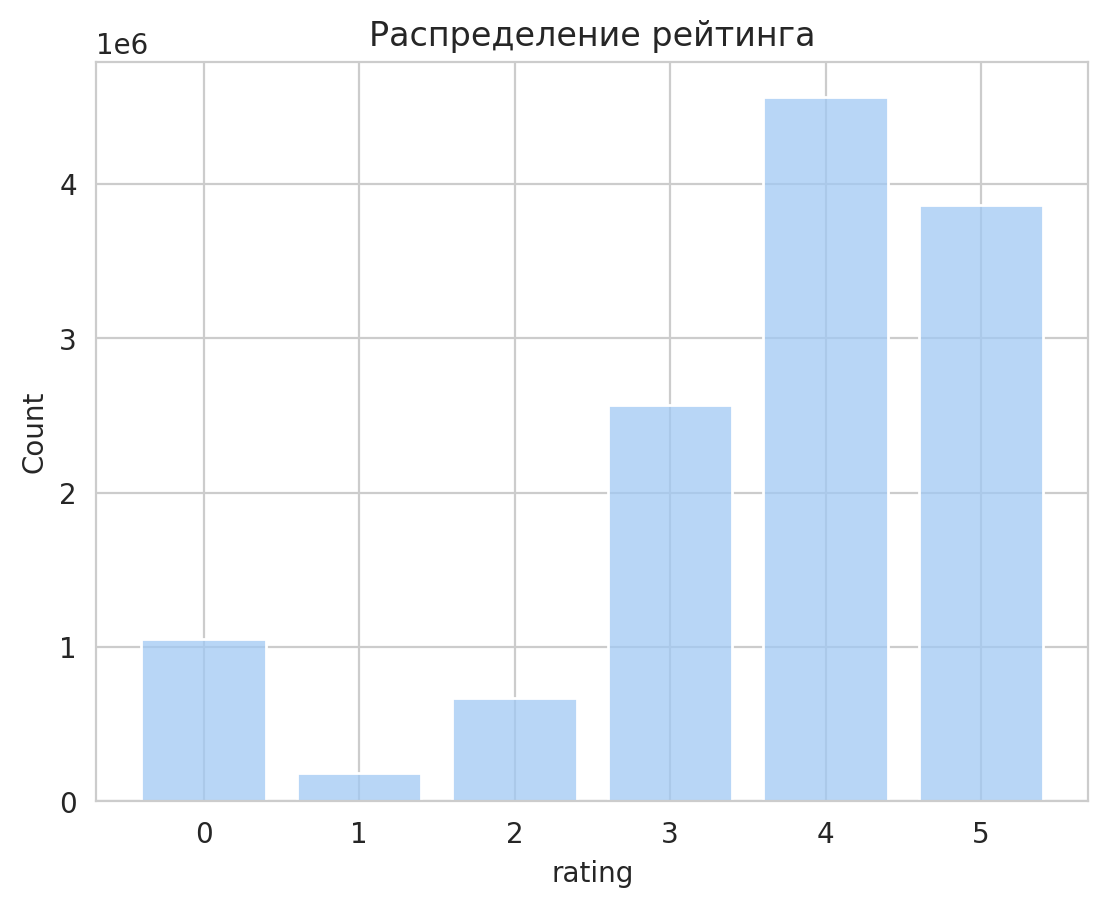

In [13]:
# Распределение рейтинга

sns.histplot(interactions['rating'], discrete=True, shrink=0.8)
plt.title('Распределение рейтинга')
plt.show()

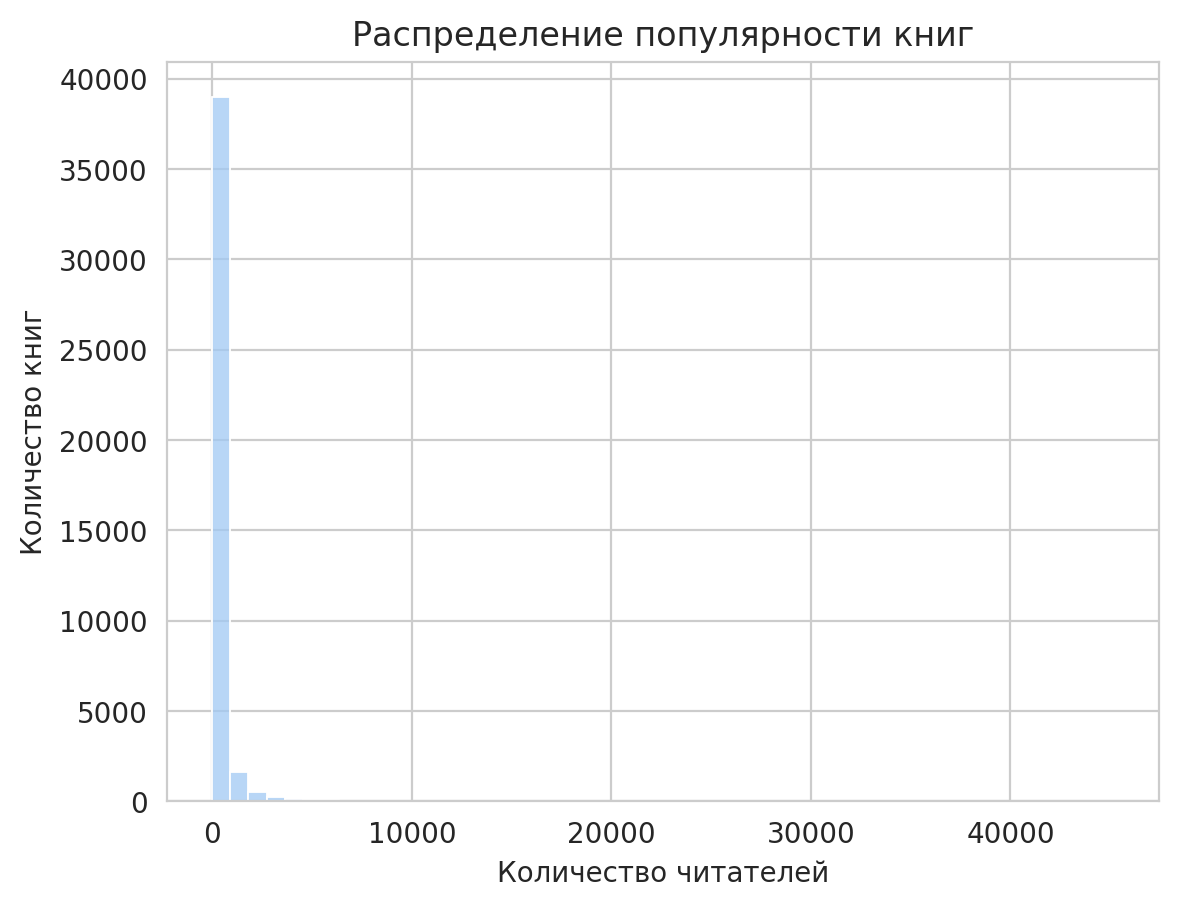

In [14]:
# Распределение популярности книг

book_popularity = interactions.groupby('book_id')['user_id'].nunique()
sns.histplot(book_popularity, bins=50)
plt.title("Распределение популярности книг")
plt.xlabel("Количество читателей")
plt.ylabel("Количество книг")
plt.show()

In [15]:
# Логические нестыковки и странности
# Проверить:
# Есть ли книги, у которых started_at позже read_at?
# Есть ли книги с is_read=True, но без даты read_at?
# Есть ли оценки (rating > 0) у книг, которые не прочитаны (is_read=False)

time_issue = interactions[interactions['started_at'] > interactions['read_at']]
read_but_no_date = interactions[interactions['is_read'] & interactions['read_at'].isna()]
rating_but_not_read = interactions[(interactions['rating'] > 0) & (~interactions['is_read'])]
print(f"Книг с started_at > read_at: {len(time_issue)}")
print(f"Книг с is_read=True, но без read_at: {len(read_but_no_date)}")
print(f"Книг с рейтингом, но не прочитанных: {len(rating_but_not_read)}")

Книг с started_at > read_at: 0
Книг с is_read=True, но без read_at: 0
Книг с рейтингом, но не прочитанных: 0


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [16]:
books["book_id"].nunique()

43312

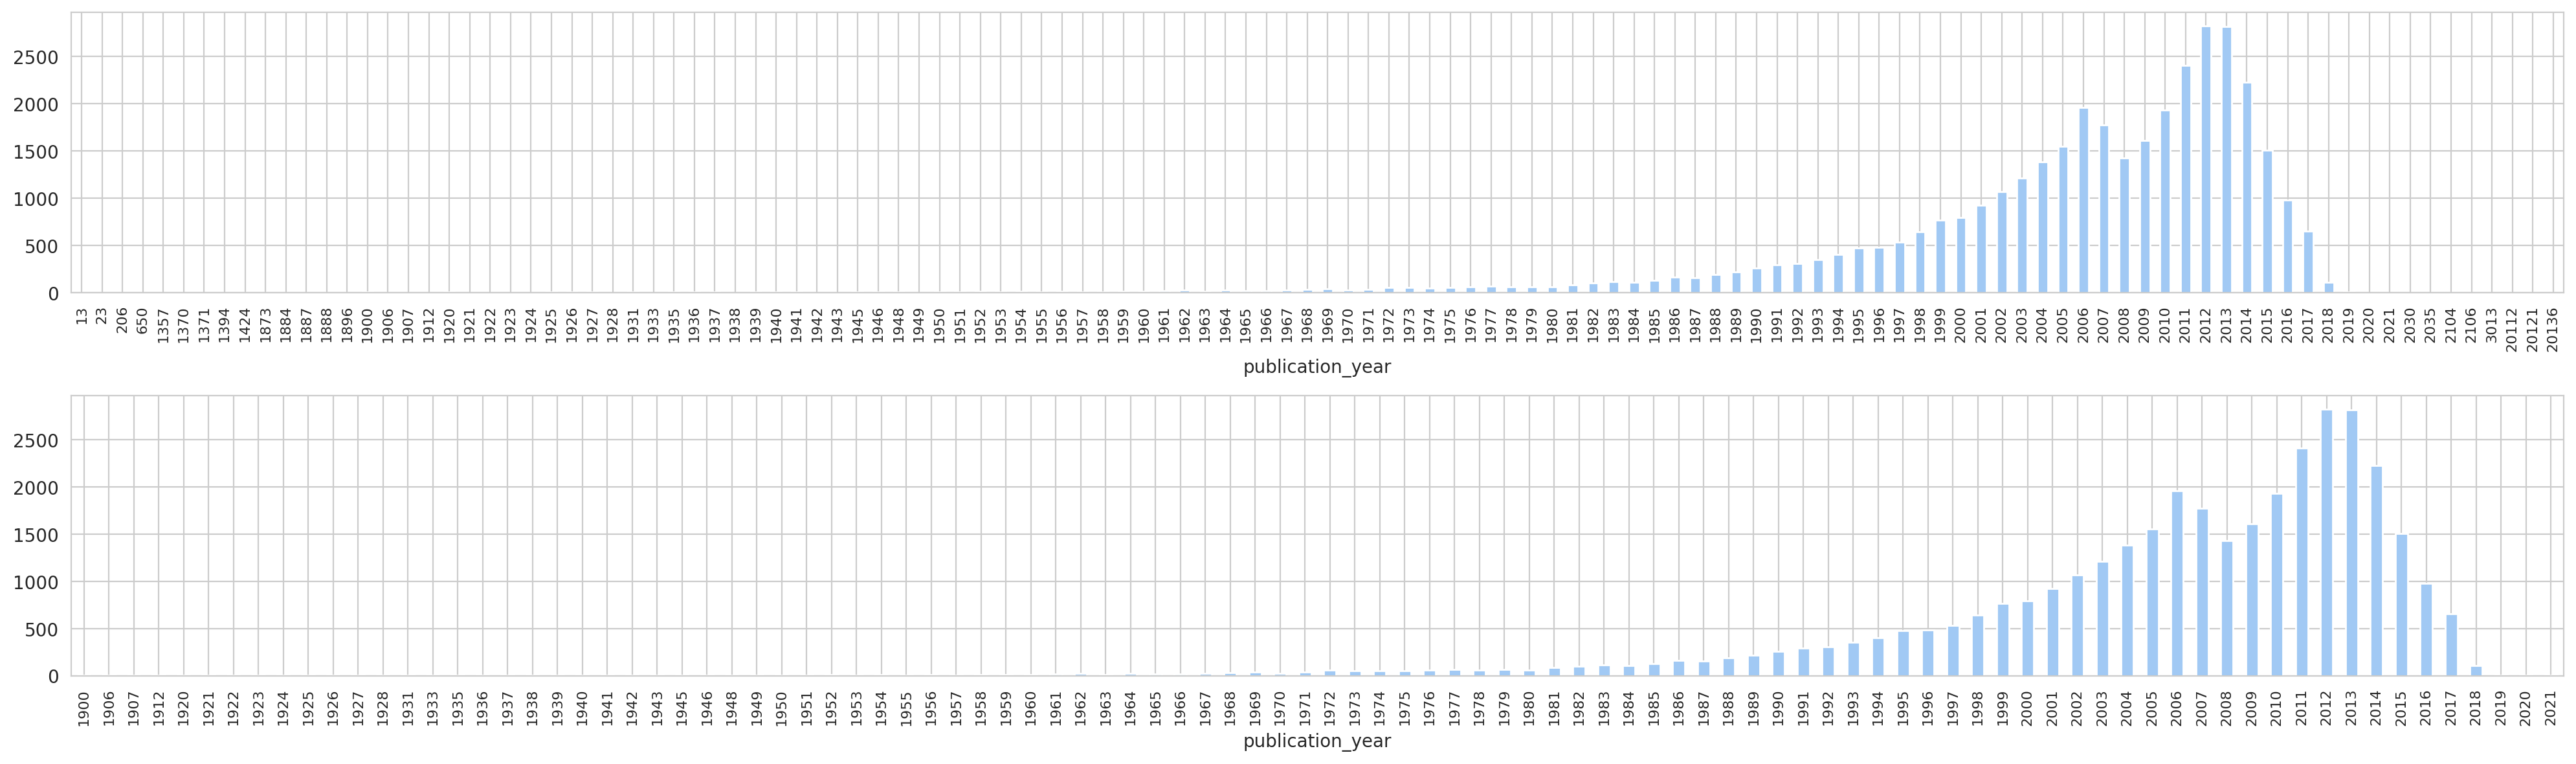

In [17]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(20, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [18]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [19]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [20]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


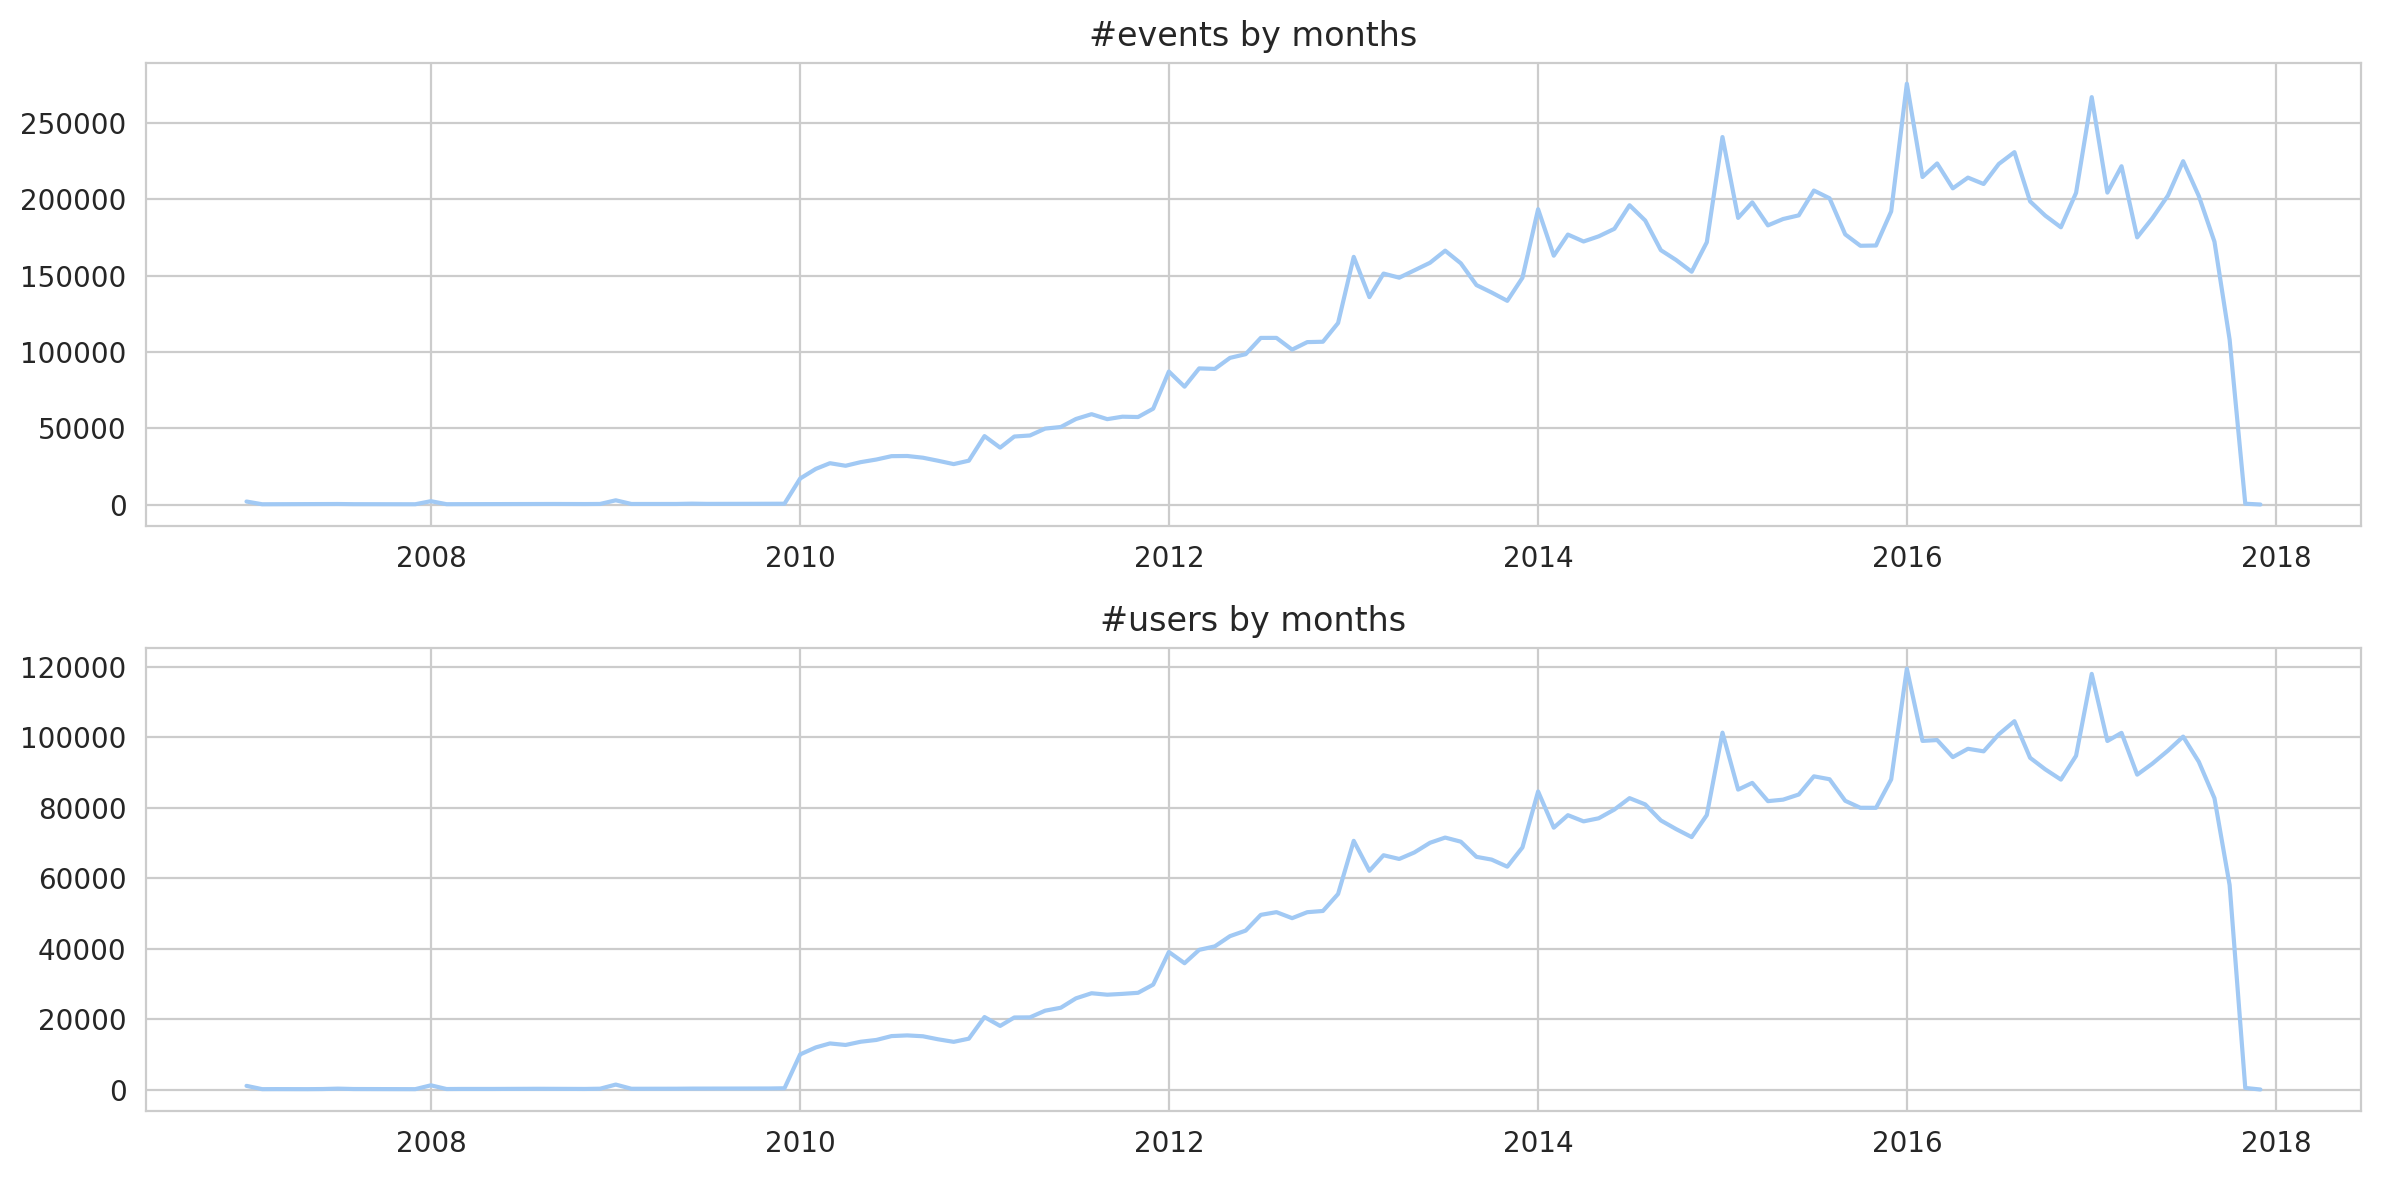

In [21]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [22]:
items = books.copy()
events = interactions.copy()

# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

In [23]:
# 1. Фильтрация по дате (до 1 ноября 2017)
event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events[
    (pd.to_datetime(events['started_at']).dt.date < event_cutoff_date) & 
    (pd.to_datetime(events['read_at']).dt.date < event_cutoff_date)
].copy()

# Ваш код здесь

In [24]:
# 2. Фильтрация событий
events = events[
    (events['is_read'] == True) &          # Только прочитанные книги
    (events['rating'] > 0)                 # Только с оценкой
].copy()


In [25]:
# 3. Переименование столбцов
events = events.rename(columns={'book_id': 'item_id'})
items = items.rename(columns={'book_id': 'item_id'})

In [26]:
# 4. Отбор пользователей с 2+ книгами
user_book_counts = events.groupby('user_id')['item_id'].nunique()
valid_users = user_book_counts[user_book_counts >= 2].index
events = events[events['user_id'].isin(valid_users)].copy()

In [27]:
# 5. Перекодировка user_id в числовой вид (начиная с 1_000_000)
# Шаг 1: Создаем маппинг из уникальных user_id в числовые ID (начиная с 1_000_000)
unique_users = sorted(events['user_id'].unique())
user_id_map = {old_id: new_id for new_id, old_id in enumerate(unique_users, 1_000_000)}

# Шаг 2: Применяем маппинг к столбцу user_id
events['user_id'] = events['user_id'].map(user_id_map)

In [28]:
# Проверка результатов
print("Результаты обработки:")
print(f"- Книг (items): {len(items)}")
print(f"- Событий (events): {len(events)}")
print(f"- Уникальных пользователей: {events['user_id'].nunique()}")
print(f"- Уникальных книг: {events['item_id'].nunique()}")
print(f"- Диапазон дат: {events['read_at'].min()} - {events['read_at'].max()}")

Результаты обработки:
- Книг (items): 43312
- Событий (events): 11751086
- Уникальных пользователей: 430585
- Уникальных книг: 41673
- Диапазон дат: 2007-01-01 - 2017-10-31


In [29]:
# Расчет доли оставшихся событий

remaining_ratio = len(events) / len(interactions)
print(f'Доля оставшихся событий: {remaining_ratio:.1%}') 

Доля оставшихся событий: 91.2%


In [30]:
user_id_map['8f50136afeb65c55cec7b3d306c24b03']

1241243

In [31]:
# Удаление исходных датафреймов для освобождения памяти
del books, interactions

# Сохранение результатов

In [32]:
# 6. Сохранение результатов

items.to_parquet("items.par")
events.to_parquet("events.par")